In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
sns.set(color_codes=True)

In [2]:
trainDataDir = "dataset/two-sigma-connect-rental-listing-inquiries/train.json.zip"

In [3]:
trainData = pd.read_json(trainDataDir, convert_dates=['created'])
trainData = trainData.reset_index(drop=True)
trainData

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
49348,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
49349,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
49350,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


# Histograms

### Price 

In [4]:
price = trainData[['price']]
price.head(5)

,price
0,2400
1,3800
2,3495
3,3000
4,2795


In [5]:
ulimit = np.percentile(price['price'].values, 99)
price['price'].loc[price['price']>ulimit] = ulimit

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
priceDist = price[['price']].groupby('price').size().reset_index(name='count')
priceDist = priceDist.sort_values("count").reset_index(drop=True)
priceDist.head(5)

,price,count
0,43.0,1
1,4535.0,1
2,4531.0,1
3,4519.0,1
4,4507.0,1


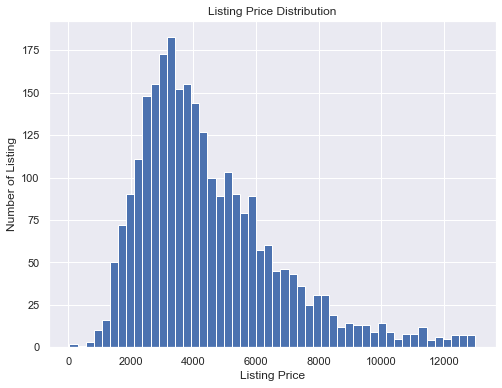

In [7]:
plt.figure(figsize=(8,6))
plt.title("Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Number of Listing")
plt.hist(priceDist["price"], bins=50)
# plt.show()
# plt.savefig("figures_saved/histogram_price.svg", format="svg")
plt.savefig("figures_saved/histogram_price")

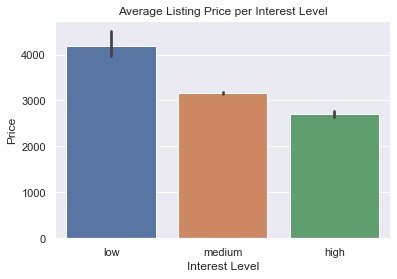

In [8]:
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'], data=trainData)
plt.title("Average Listing Price per Interest Level")
plt.xlabel('Interest Level')
plt.ylabel('Price')
plt.savefig("figures_saved/histogram_price-interest")

### Latitude

In [9]:
latlon = trainData[['latitude', 'longitude']]
lat = latlon[['latitude']]
lat.head(5)

,latitude
0,40.7108
1,40.7513
2,40.7575
3,40.7145
4,40.7439


In [10]:
llimit = np.percentile(lat['latitude'].values, 1)
ulimit = np.percentile(lat['latitude'].values, 99)
lat['latitude'].loc[lat['latitude']<llimit] = llimit
lat['latitude'].loc[lat['latitude']>ulimit] = ulimit

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


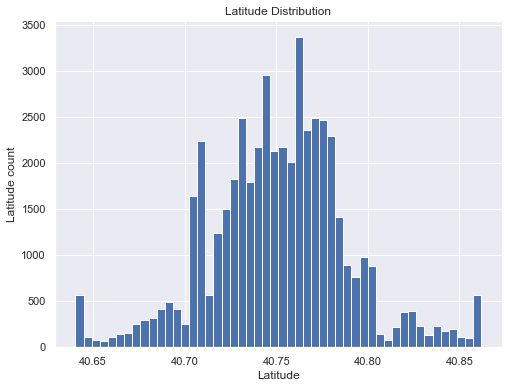

In [11]:
plt.figure(figsize=(8,6))
plt.title("Latitude Distribution")
plt.xlabel("Latitude")
plt.ylabel("Latitude count")
plt.hist(lat["latitude"], bins=50)
# plt.show()
plt.savefig("figures_saved/histogram_latitude")

### Longitude

In [12]:
long = latlon[['longitude']]
long.head(5)

,longitude
0,-73.9539
1,-73.9722
2,-73.9625
3,-73.9425
4,-73.9743


In [13]:
llimit = np.percentile(long['longitude'].values, 1)
ulimit = np.percentile(long['longitude'].values, 99)
long['longitude'].loc[long['longitude']<llimit] = llimit
long['longitude'].loc[long['longitude']>ulimit] = ulimit

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


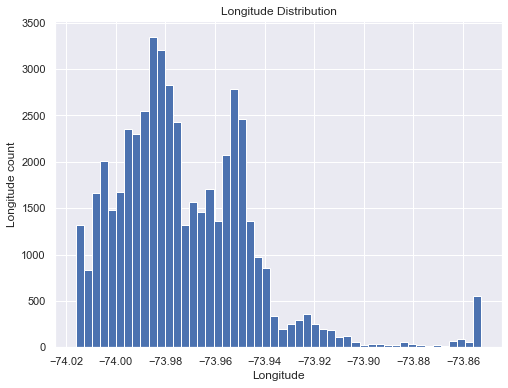

In [14]:
plt.figure(figsize=(8,6))
plt.title("Longitude Distribution")
plt.xlabel("Longitude")
plt.ylabel("Longitude count")
plt.hist(long["longitude"], bins=50)
# plt.show()
plt.savefig("figures_saved/histogram_longitude")

# Posting hours distribution

In [15]:
date = trainData[['created','interest_level', 'price']]
date.head(5)

,created,interest_level,price
0,2016-06-16 05:55:27,medium,2400
1,2016-06-01 05:44:33,low,3800
2,2016-06-14 15:19:59,medium,3495
3,2016-06-24 07:54:24,medium,3000
4,2016-06-28 03:50:23,low,2795


In [16]:
date['hour'] = date['created'].dt.hour
date['day'] = date['created'].dt.day
date['month'] = date['created'].dt.month
date

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,created,interest_level,price,hour,day,month
0,2016-06-16 05:55:27,medium,2400,5,16,6
1,2016-06-01 05:44:33,low,3800,5,1,6
2,2016-06-14 15:19:59,medium,3495,15,14,6
3,2016-06-24 07:54:24,medium,3000,7,24,6
4,2016-06-28 03:50:23,low,2795,3,28,6
...,...,...,...,...,...,...
49347,2016-04-05 03:58:33,low,2800,3,5,4
49348,2016-04-02 02:25:31,medium,2395,2,2,4
49349,2016-04-26 05:42:03,medium,1850,5,26,4
49350,2016-04-19 02:47:33,medium,4195,2,19,4


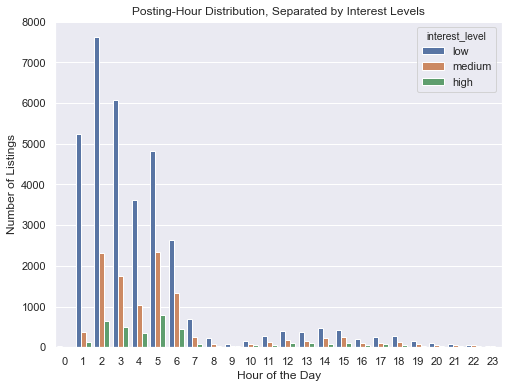

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=date)
plt.title("Posting-Hour Distribution, Separated by Interest Levels")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_hour-dist-interest')

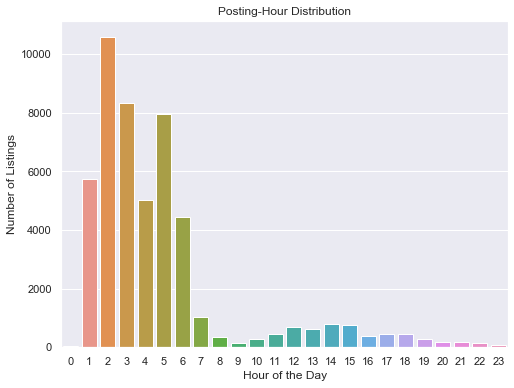

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="hour", data=date)
plt.title("Posting-Hour Distribution")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_hour-dist')

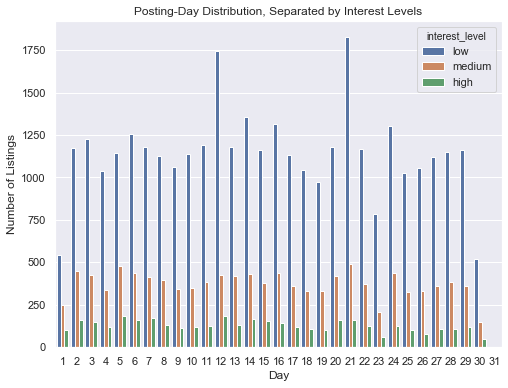

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x="day", hue="interest_level", hue_order=['low', 'medium', 'high'], data=date)
plt.title("Posting-Day Distribution, Separated by Interest Levels")
plt.xlabel('Day')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_day-dist-interest')

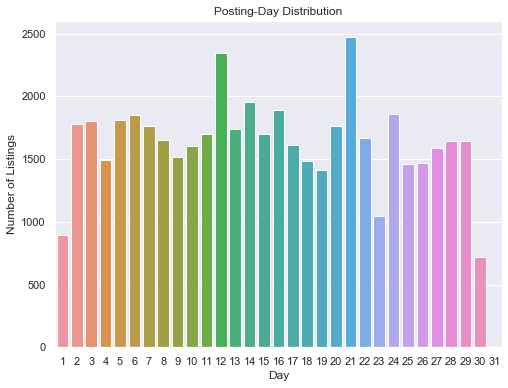

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="day", data=date)
plt.title("Posting-Day Distribution")
plt.xlabel('Day')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_day-dist')

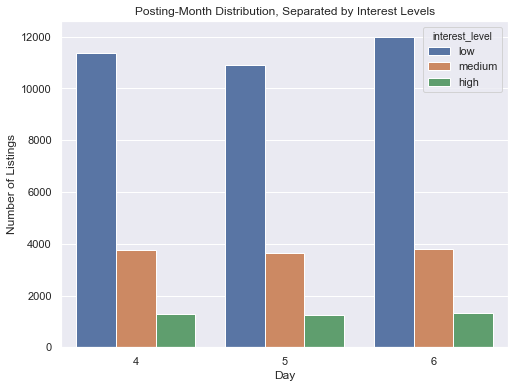

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'], data=date)
plt.title("Posting-Month Distribution, Separated by Interest Levels")
plt.xlabel('Day')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_month-dist-interest')

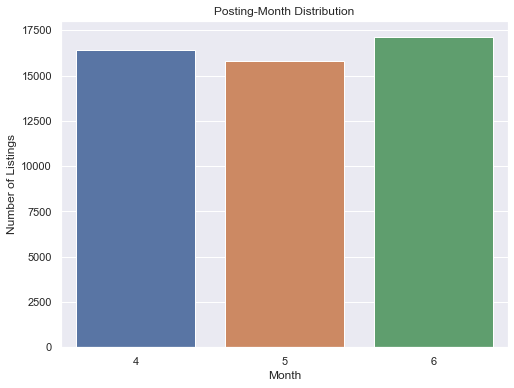

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x="month", data=date)
plt.title("Posting-Month Distribution")
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_month-dist')

## Trend Plots

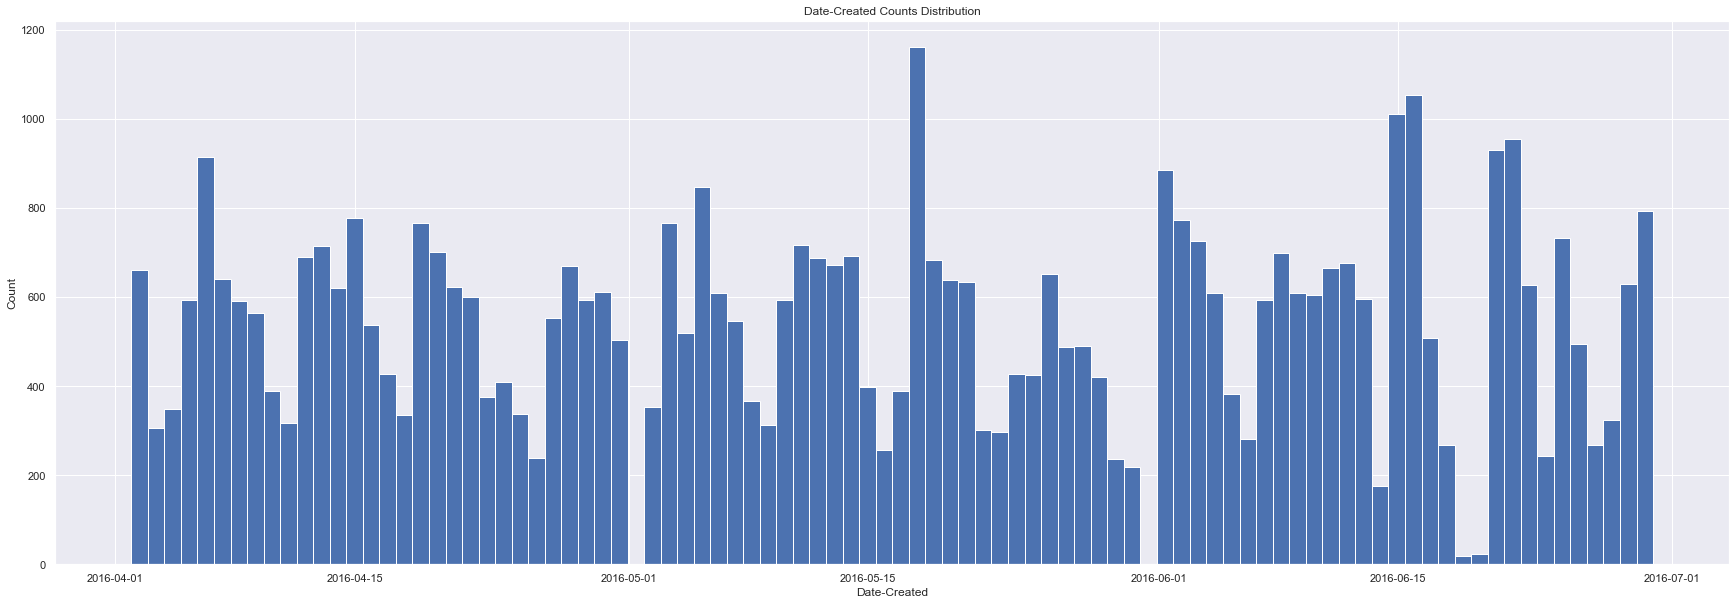

In [23]:
plt.figure(figsize=(30,10))
plt.title("Date-Created Counts Distribution")
plt.xlabel("Date-Created")
plt.ylabel("Count")

plt.hist(date.created, bins=92) # 92 days = 30+31+30+1

plt.show()
# plt.savefig("figures_saved/dist_date-created")

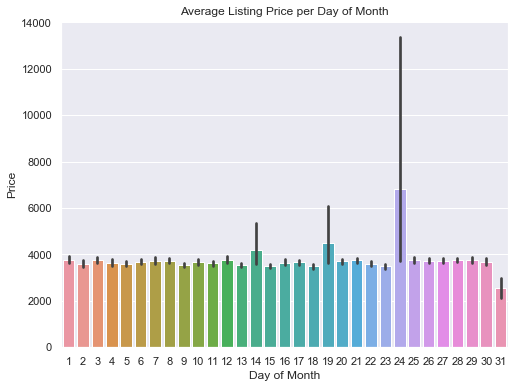

In [24]:
plt.figure(figsize=(8, 6))

sns.barplot(x="day", y="price", data=date)

plt.title("Average Listing Price per Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Price")

# plt.show()
plt.savefig("figures_saved/histogram_price-day")

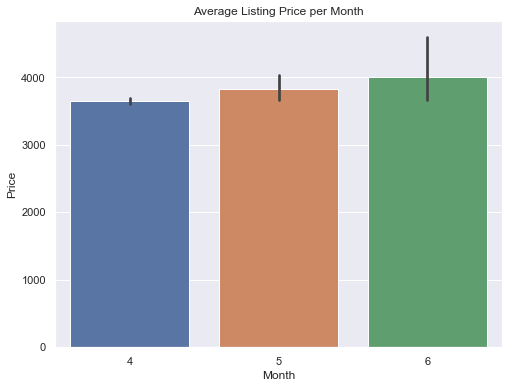

In [25]:
plt.figure(figsize=(8, 6))

sns.barplot(x="month", y="price", data=date)

plt.title("Average Listing Price per Month")
plt.xlabel("Month")
plt.ylabel("Price")

# plt.show()
plt.savefig("figures_saved/histogram_price-month")

# Proportion of Target Variable

In [26]:
targetVar = trainData[['interest_level']]

In [27]:
proportion = targetVar[['interest_level']].groupby('interest_level').size().reset_index(name='count')
proportion = proportion.sort_values("count", ascending = False).reset_index(drop=True)
proportion.head(5)

,interest_level,count
0,low,34284
1,medium,11229
2,high,3839


In [28]:
proportion['percentage'] = proportion['count'].apply(lambda x: x/proportion['count'].sum()*100)
proportion

,interest_level,count,percentage
0,low,34284,69.468309
1,medium,11229,22.752877
2,high,3839,7.778813


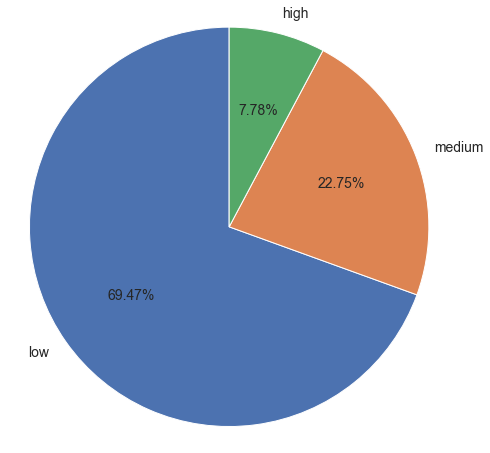

In [29]:
plt.figure(figsize=(8,8))
plt.pie(proportion['percentage'], labels=proportion['interest_level'], autopct='%1.2f%%', startangle=90, radius=5, textprops={'fontsize': 14})
plt.axis('equal')
# plt.show()
plt.savefig("figures_saved/pie_interest_proportion")

# Listing location

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


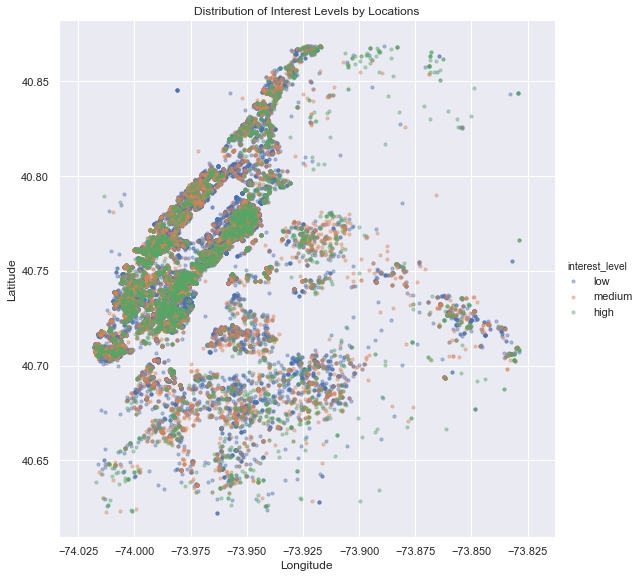

In [30]:
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=8, scatter_kws={'alpha':0.4,'s':10},
           data=trainData[(trainData.longitude>trainData.longitude.quantile(0.005))
                           &(trainData.longitude<trainData.longitude.quantile(0.995))
                           &(trainData.latitude>trainData.latitude.quantile(0.005))                           
                           &(trainData.latitude<trainData.latitude.quantile(0.995))]);
plt.title("Distribution of Interest Levels by Locations")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('figures_saved/map_location-interest')

# Number of bathrooms

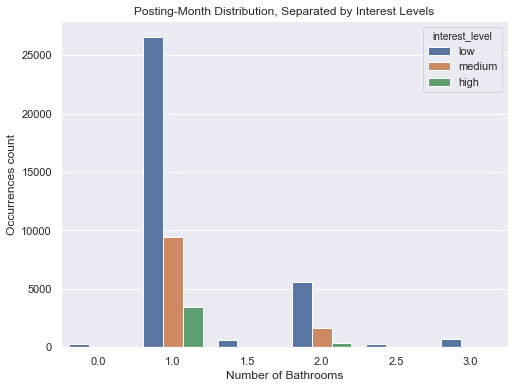

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', hue='interest_level', hue_order=['low', 'medium', 'high'], data=trainData[trainData.bathrooms <= 3])
plt.title("Posting-Month Distribution, Separated by Interest Levels")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Occurrences count')
plt.savefig('figures_saved/histogram_bathroom-dist-interest')

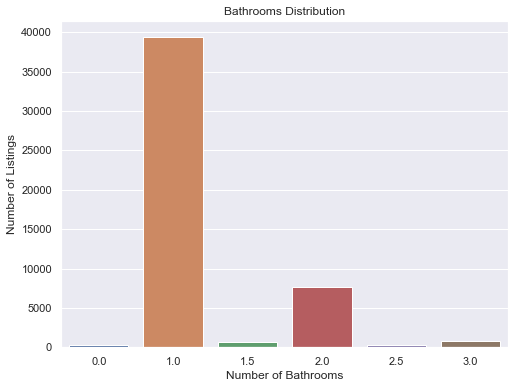

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x='bathrooms', data=trainData[trainData.bathrooms <= 3])
plt.title("Bathrooms Distribution")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_bathroom-dist')

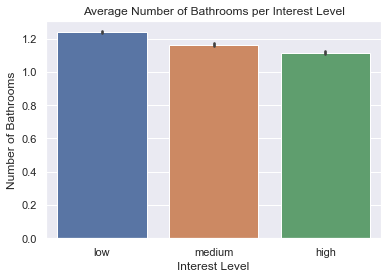

In [33]:
sns.barplot(x="interest_level", y="bathrooms", order=['low', 'medium', 'high'], data=trainData)
plt.title("Average Number of Bathrooms per Interest Level")
plt.xlabel('Interest Level')
plt.ylabel('Number of Bathrooms')
plt.savefig("figures_saved/histogram_bathroom-interest")

# Number of bedrooms

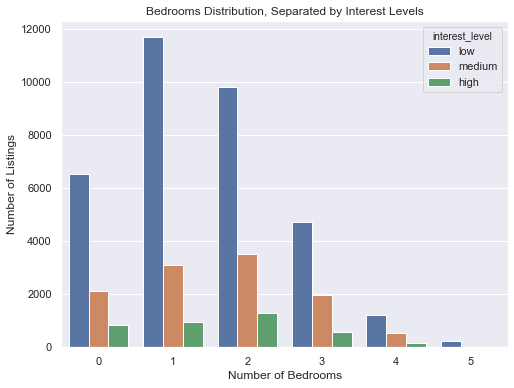

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', hue_order=['low', 'medium', 'high'], data=trainData[trainData.bedrooms <= 5])
plt.title("Bedrooms Distribution, Separated by Interest Levels")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.savefig('figures_saved/histogram_bedroom-dist-interest')

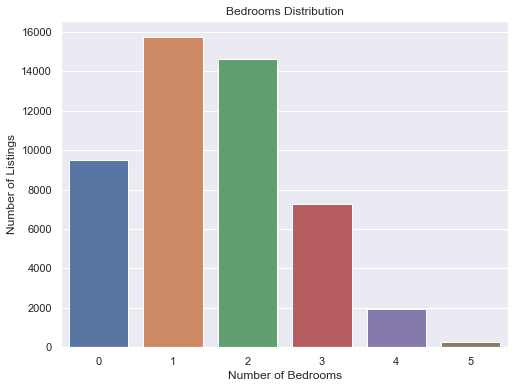

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', data=trainData[trainData.bedrooms <= 5])
plt.title("Bedrooms Distribution")
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of Listings');
plt.savefig('figures_saved/histogram_bedroom-dist')

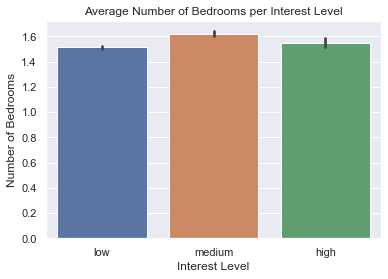

In [36]:
sns.barplot(x="interest_level", y="bedrooms", order=['low', 'medium', 'high'], data=trainData)
plt.title("Average Number of Bedrooms per Interest Level")
plt.xlabel('Interest Level')
plt.ylabel('Number of Bedrooms')
plt.savefig("figures_saved/histogram_bedroom-interest")